# **Task 1** 

In this task, we have checked for missing/null values. Then we detected the outliers using Tukey's rule, removed them and reported the number of outliers and details of the findings. 

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
states_df = pd.read_csv("States Data/22.csv")

In [3]:
#Checking for null values in dataset
print(states_df.isnull().values.any())

False


There are **no missing values** in the dataset.

In [4]:
#Calculating the difference between each row as cumulative data is given in the states dataset. 
states_df_inter = states_df.set_index('Date').diff()
states_df_inter.fillna(0, inplace=True)

In [5]:
#Calculating the Q1, Q3 and IQR
Q1 = states_df_inter.quantile(0.25)
Q3 = states_df_inter.quantile(0.75)
IQR = Q3 - Q1
print("---- Lower range for Tukey's rule ----\n\n")
print("Column\t\tValue\n")
print(Q1 - 1.5 * IQR)
print("\n\n---- Upper range for Tukey's rule ----\n\n")
print("Column\t\tValue\n")
print(Q3 + 1.5 * IQR)

---- Lower range for Tukey's rule ----


Column		Value

TN confirmed    -2696.750
TX confirmed   -10068.125
TN deaths         -45.000
TX deaths        -213.000
dtype: float64


---- Upper range for Tukey's rule ----


Column		Value

TN confirmed     5275.250
TX confirmed    19458.875
TN deaths          83.000
TX deaths         401.000
dtype: float64


In [6]:
states_df_inter.shape

(438, 4)

In [7]:
states_df_inter.to_csv("States Data/22_inter.csv")

In [8]:
#Getting the rows which are outliers (detected by Tukey's rule with alpha = 1.5)
outliers = states_df_inter[((states_df_inter < (Q1 - 1.5 * IQR)) |(states_df_inter > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,TN confirmed,TX confirmed,TN deaths,TX deaths
Date,,,,
2020-07-27,2547.0,4412.0,11.0,673.0
2020-07-31,5793.0,8360.0,27.0,295.0
2020-11-09,5860.0,4193.0,15.0,22.0
2020-11-11,3630.0,11071.0,89.0,141.0
2020-11-15,5817.0,6008.0,16.0,89.0
...,...,...,...,...
2021-02-03,1856.0,17372.0,133.0,418.0
2021-02-04,3154.0,15131.0,169.0,439.0
2021-02-05,2661.0,15357.0,203.0,401.0


In [9]:
outliers.to_csv("States Data/outliers.csv")
outliers_date = outliers.reset_index().iloc[:,0].tolist()

There were **62 outliers**. The outlier values can be found in outliers.csv

We can confirm the outliers from the box plots for the 4 columns 

<AxesSubplot:xlabel='TN confirmed'>

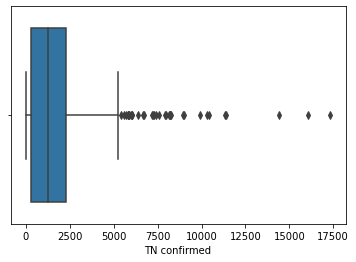

In [10]:
sns.boxplot(x=states_df_inter['TN confirmed'])

<AxesSubplot:xlabel='TX confirmed'>

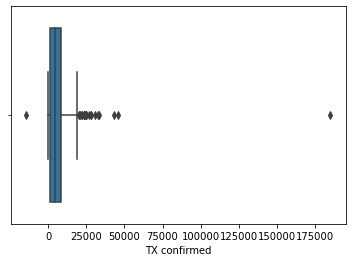

In [11]:
sns.boxplot(x=states_df_inter['TX confirmed'])

<AxesSubplot:xlabel='TN deaths'>

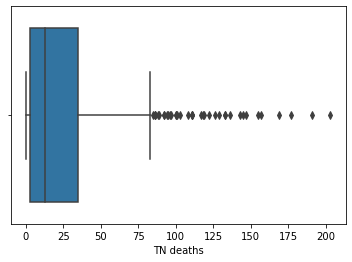

In [12]:
sns.boxplot(x=states_df_inter['TN deaths'])

<AxesSubplot:xlabel='TX deaths'>

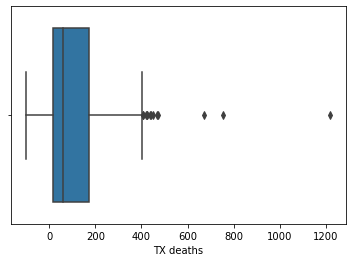

In [13]:
sns.boxplot(x=states_df_inter['TX deaths'])

In [14]:
#Removing the outliers from data
states_df_inter = states_df_inter.reset_index()
states_df_out = states_df_inter[~states_df_inter['Date'].isin(outliers_date)]
states_df_out.shape

(376, 5)

In [15]:
states_df_out.to_csv("States Data/22_cleaned.csv")

**The 62 outliers detected are dropped and the remaining daily data values are stored in 22_cleaned.csv**